# Value Class & Graph with nodes and edges exaple

This video is related (but not identical) to the code example below.

<iframe width="560" height="315" src="https://www.youtube.com/embed/VMj-3S1tku0?si=SmjGGk1hFI18pxIT&amp;start=1164" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

**Problem to be solved:** We have to make a new kind of tool that can help us build a chart like this: 

![](output.svg.svg)

The actual drawing (the graphics) is done by a a tool called 'graphviz', and a few [functions](testfiles/graphcode.py), making use of graphviz, and then imported into this notebook. 

This "tool" needs some information, which in this case basically is a number (a=2.0, b=-3.0).    
The usual number storing object ('int') can't keep all the information we need. Besides just holding a number, we want this new tool to remember the original name of the object (a, b), what other objects helped make it (in c´s case it is a, b), and what math actions (like + or *) were used to create it. So, we need to build a new, and more complex object (or datastructure) that can remember all these things.

In [3]:
# Install graphviz on you computer: https://graphviz.org/download/
# install requirement packages in this project
%pip install graphviz

#import into this project
from graphviz import Digraph


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
class Value:
  
    def __init__(self, data, _parents=(), _operator='', label=''):
        self.data = data                # the actual value
        self._prev = set(_parents)      # the 2 or more object used to create the object
        self._op = _operator            # the operator used when creating the object (+,-,*,/)
        self.label = label              # The variable name connected to the object

    def __repr__(self):
        return f"Value(data={self.data})"
  
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')

    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')

    def __sub__(self, other):
        return Value(self.data - other.data, (self, other), '-')
  
    def __truediv__(self, other):
        if other.data == 0:  # Division by zero check
            raise ValueError("Division by zero is not allowed")
        return Value(self.data / other.data, (self, other), '/')

### Draw Dot Code
The following import of a functions are not super important for you to look at right now.     
The function 'draw_dot' takes care of drawing the diagram, and expects a Value object as parameter input.     

**The focus in this demo should be on the Value class.**    

If you later look through the code step by step, you should by now (after 6 weeks with python) be able to understand what it does.     
If you do not understand the code, it is a good exercise to go through the code and understand it.

The [graphcode.py](https://github.com/python-elective-kea/fall2023-code-examples-from-teachings/tree/master/ses7/graphcode.py) can be found in the code from today session.

In [5]:
# These 2 functions are not super important for you to look at right now. The fokus should be on the Value class. 
# But basicly what the 2 functions do are to produce the graph below with its nodes and edges. 
# If you later look through the code step by step, you should by now be able to understand what it does. 
# If not it is a good exercise to do so. 

# In order for this to work you have to install graphviz on your laptop. 
# Install graphviz on you computer: https://graphviz.org/download/

# Then install graphviz in the environment 'pip install graphviz'

from graphviz import Digraph


def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name=uid, label=f"{{ {n.label} | data {n.data:.1f} }}", shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name=uid + n._op, label=n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

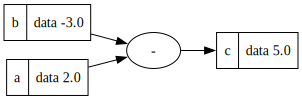

In [9]:
a = Value(2, label='a')
b = Value(-3, label='b')
c = a - b; c.label='c'




draw_dot(c)